# Tensors
In general, all current machine-learning systems use tensors as their basic data structure. Tensors are containers for numbers and a generalization of matrices to an arbitrary number of dimensions (or axes). 

### Scalars (0D tensors)
A tensor that contains only one number is a scalar tensor, or 0-dimensional tensor, or 0D tensor. 

In [1]:
import numpy as np
x = np.array(9)
x.ndim

0

### Vectors (1D tensors)
A list or array of numbers is called a vector, or 1D tensor.

In [2]:
x = np.array([1, 2, 3, 4])
x.ndim

1

Note: the vector above has 4 entries and is sometimes called a 4-dimensional *vector*. Don't confuse this with a 4D tensor.

### Matrices (2D tensors)
An array of vectors is a matrix, or 2D tensor. The entries from the first axis are called rows and the entries from the second axis are called columns. In the following example, `[1, 2, 3, 4, 5]` is the first row and `[1, 6, 11]` is the first column.

In [4]:
x = np.array([[1, 2, 3, 4, 5],
             [6, 7, 8, 9, 10],
             [11, 12, 13, 14, 15]])
x.ndim

2

### 3D tensors and higher-dimensional tensors
If you pack multiple matrices into a new array, you obtain a 3D tensor, which you can visually interpret as a cube of numbers. An example is below. By packing 3D tensors into an array you can create a 4D tensor, and so on. In general, deep learning only involves 0D to 4D tensors, although video data requires 5D. 

In [9]:
x = np.array([[[1, 2, 3, 4, 5],
             [6, 7, 8, 9, 10],
             [11, 12, 13, 14, 15]],
             [[1, 2, 3, 4, 5],
             [6, 7, 8, 9, 10],
             [11, 12, 13, 14, 15]],
             [[1, 2, 3, 4, 5],
             [6, 7, 8, 9, 10],
             [11, 12, 13, 14, 15]]])
x.ndim

3

## Key attributes
* **Number of axes** (rank) - `ndim` in python.  


* **Shape** - A tuple of integers that describes how many dimensions the tensor has along each axis. In the previous example, the tensor has shape `(3, 3, 5)`. There are 3 matrices, each with 3 rows and 5 columns. Note that a vector has shape `(n, )` where `n` is the length of the vector, whereas a scalar has an empty shape, `()`.  


* **Data type** - `dtype` in python. This is the type of the data contained in the tensor. For example, a tensor's type could be `float32`, `uint8`, `float64` and so on. Note that string tensors don't exist in Numpy (or in most other libraries).

## Example - MNIST Data
The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. Let's play around with it.

In [2]:
# Load the data set
import keras
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.ndim)  # Number of axes or dimensions
print(train_images.shape) # Tensor Shape
print(train_images.dtype) # Data type

3
(60000, 28, 28)
uint8


We have a 3D tensor of 60,000 matrices 0f 28 x 28 integers. Each matrix is a greyscale image with coefficients between 0 and 255. Let's look at a specific digit. 

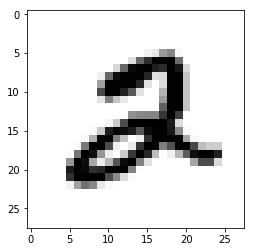

In [5]:
digit = train_images[5] # Display the 5th digit

import matplotlib.pyplot as plt
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

By selecting a specific digit, we are selecting a specific element in a tensor, which is known as ***tensor slicing***. The following code shows 3 different ways of selecting digits \#10 to \#100, each giving you the same object. The commas inside the brackets separate the different axes. In general, the first axis (axis 0 because indexing starts at 0 in python) will be the samples axis (sometimes called the samples dimension). In the MNIST data set, samples are images of digits. Including a `:` means use all elements in this axis.

In [6]:
my_slice = train_images[10:100]
print(my_slice.shape)

my_slice = train_images[10:100, :, :]       # Equivalent to the previous example
print(my_slice.shape)

my_slice = train_images[10:100, 0:28, 0:28] # Also equivalent to the previous example
print(my_slice.shape)

(90, 28, 28)
(90, 28, 28)
(90, 28, 28)


## Data Batches
Deep-learning models don't process an entire data set at once - they break the data into small ***batches***. For example, here's once batch of MNIST digits with batch size 200:

In [7]:
batch = train_images[:200]

## Other tensor examples

* **Vector data** - 2D tensors of shape `(samples, features)`.


* **Time series or sequence data** - 3D tensors of shape `(samples, timesteps, features)`.


* **Images** - 4D tensors of shape `(samples, height, width, channels)`, or `(samples, channels, height, width)`. Note that channels refer to color depth. Grey scale images (like the MNIST data set) have a color depth of 1, whereas color images have a color depth of 3 (RGB). Also, *TensorFlow* uses the *channels-last* convention - `(samples, height, width, channels)`, while *Theano* uses the *channels-first conventions* - `(samples, channels, height, width)`. Keras provides support for both formats.


* **Video** - 5D tensors of shape `(samples, frames, height, width, channels)` or `(samples, frames, channels, height, width)`. Think of this data as a sequence of images, which here are referred to as frames. 

## Tensor Operations
### Element-wise operations
Element-wise operations are operations that are applied independently to each entry in the tensors being considered. The slow way of performing these operations would be with a for loop. In python, these useful operations are well-optimized built-in Numpy functions, which themselves delegate the heavy lifting to a Basic Linear Algebra Subprograms (BLAS) implementation. BLAS are low-level, highly parallel, efficient tensor-manipulation routines that are typically implemented in Fortran or C.  

### Broadcasting
Broadcasting allows element-wise operations between two tensors with different shapes (when possible). The smaller tensor will be *broadcasted* to match the shape of the larger tensor. This happens in 2 steps:

1. Axes (called *broadcast axes* are added to the smaller tensor to match the `ndim` of the larger tensor.
2. The smaller tensor is repeated alongside these new axes to match the full shape of the larger tensor.

As an example, consider `X` with shape `(32,10` and `y` with shape `(10,)`. First, we add an empty first axis to `y`, whose shape becomes `(1, 10)`. Then, we repeat `y` 32 times alongside this new axis, so that we end up with a tensor `Y` with shape `(32, 10)` where `Y[i, :] == y` for `i` in `range(0,32)`. Now we can easily perform different operations, like addition, to `X` and `Y`.

Python does this automatically at the algorithmic level and not at the memory level. For example:

In [9]:
import numpy as np

X = np.random.random((64, 3, 32, 10))  # A random tensor with shape (64, 3, 32, 10)
y = np.random.random((32, 10))         # A random tensor with shape (32, 10)

Z = np.maximum(X, y)  # The ouput Z has shape (64, 3, 32, 10) like X

### Tensor Dot

The dot operation, or *tensor product* is the most common and morst useful tensor operation. Don't confuse it with an element-wise product - it combines entries in the input vectors. In python, the `dot` operator is used: `z = np.dot(x,y)`. Note that for matrices, you can only take the dot product if `x.shape[1] == y.shape[0]`. The result is a matrix with shape `x.shape[0] == y.shape[1]`.

### Tensor Reshaping

Reshaping a tensor means rearranging its rows and columns to match a target shape. For example:

In [14]:
x = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])
print(x.shape)

(3, 2)


In [15]:
x = x.reshape((6, 1))
print(x)

[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]


In [16]:
x = x.reshape((2, 3))
print(x)

[[0. 1. 2.]
 [3. 4. 5.]]


A special case of reshaping that is commonly used is *transposition*. Transposing a matrix means exchanging its rows and columns, so that `x[i, :]` becomes `x[:, i]`:

In [ ]:
x = np.zeros((300, 20))  # Creates an all-zeros matrix of shape (300,20)
x = np.transpose(x)
print(x.shape)